In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import csv
import datetime
import gsw
import glob
import matplotlib as mpl
import matplotlib.cm as cm
#import matplotlib.colormaps as cmaps
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpl_toolkits.axes_grid1.inset_locator as inset_axes
import numpy as np
from numpy import linspace
import os
import pandas as pd
import pickle
#import rasterio.plot
import scipy.io
#import seaborn as sns
import seawater
import seawater.eos80 as sw
import xarray as xr
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from shapely.geometry import LineString, MultiLineString, Point, Polygon
from shapely.ops import unary_union


mpl.style.use('seaborn-muted')
#mpl.rc('font', family ='Arial')

/tmp/ipykernel_345432/993967909.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-muted')


In [3]:
#load bathymetry data

# Open the NetCDF file with xarray
gebco_full = xr.open_dataset('../Data/Final/bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')


In [4]:
# Load the CSV data
df = pd.read_csv('polygon_shelf.csv')

# Extract X and Y coordinates
x = df['X'].tolist()
y = df['Y'].tolist()


<Figure size 640x480 with 0 Axes>

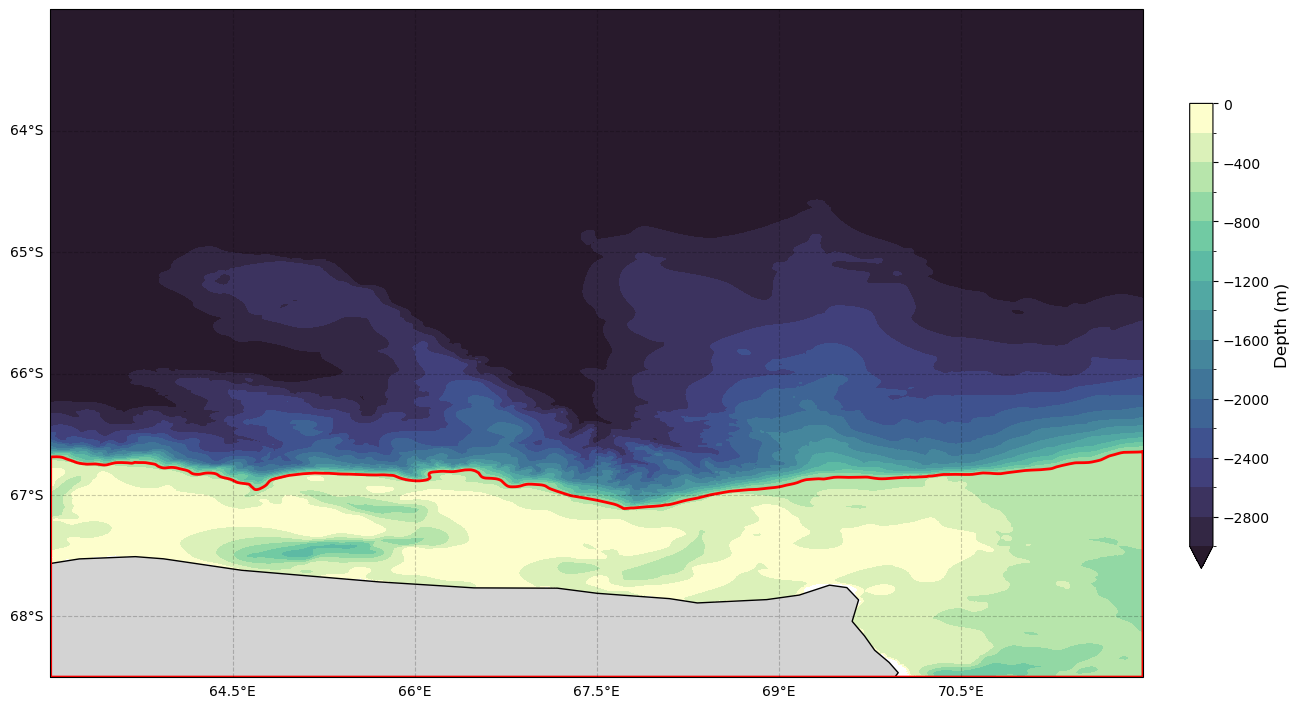

In [5]:
#This plots the polygon on the map to check it works

# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
Coast = cfeature.NaturalEarthFeature(category='physical',scale='50m',facecolor='none',name='coastline')
feature = ax.add_feature(Coast,edgecolor='black',facecolor='lightgray') # need to find a better land mask than this.
ax.set_extent([63, 72, -68.5, -63])
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Use the custom colormap with light gray color for values >= 0
elevation = gebco_full.elevation.where(gebco_full.elevation < 0, np.nan)

#add data
im = elevation.plot.contourf(x='lon',y='lat',cmap='cmo.deep_r',levels=np.array([*np.arange(-3000,200,200)]),add_colorbar=False)

# Add a contour line for the 600m isobath
##contour_line_coordinates comes from 'CTD mapping seals and CTD with type' notebook. 
#ax.plot(contour_line_coordinates[:, 0], contour_line_coordinates[:, 1], color='white', linewidth=3)

# # Plot the result using Matplotlib
# x, y = polygon.exterior.xy

# Plot the contour polygon
ax.plot(x, y, color='red', linewidth=2)

#add colourbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Depth (m)', fontsize=12)

plt.show()

In [3]:
# Load the variables from the file
# these contours were calculated in the 'neu_dens_contours_calculation.ipynb' file
with open('neu_dens_contours.pkl', 'rb') as file:
    data = pickle.load(file)

# Access the variables
x_curve1 = data['x_curve1']
y_curve1 = data['y_curve1']
x_curve2 = data['x_curve2']
y_curve2 = data['y_curve2']

/tmp/ipykernel_345432/754498430.py:69: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_custom, norm=norm), orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


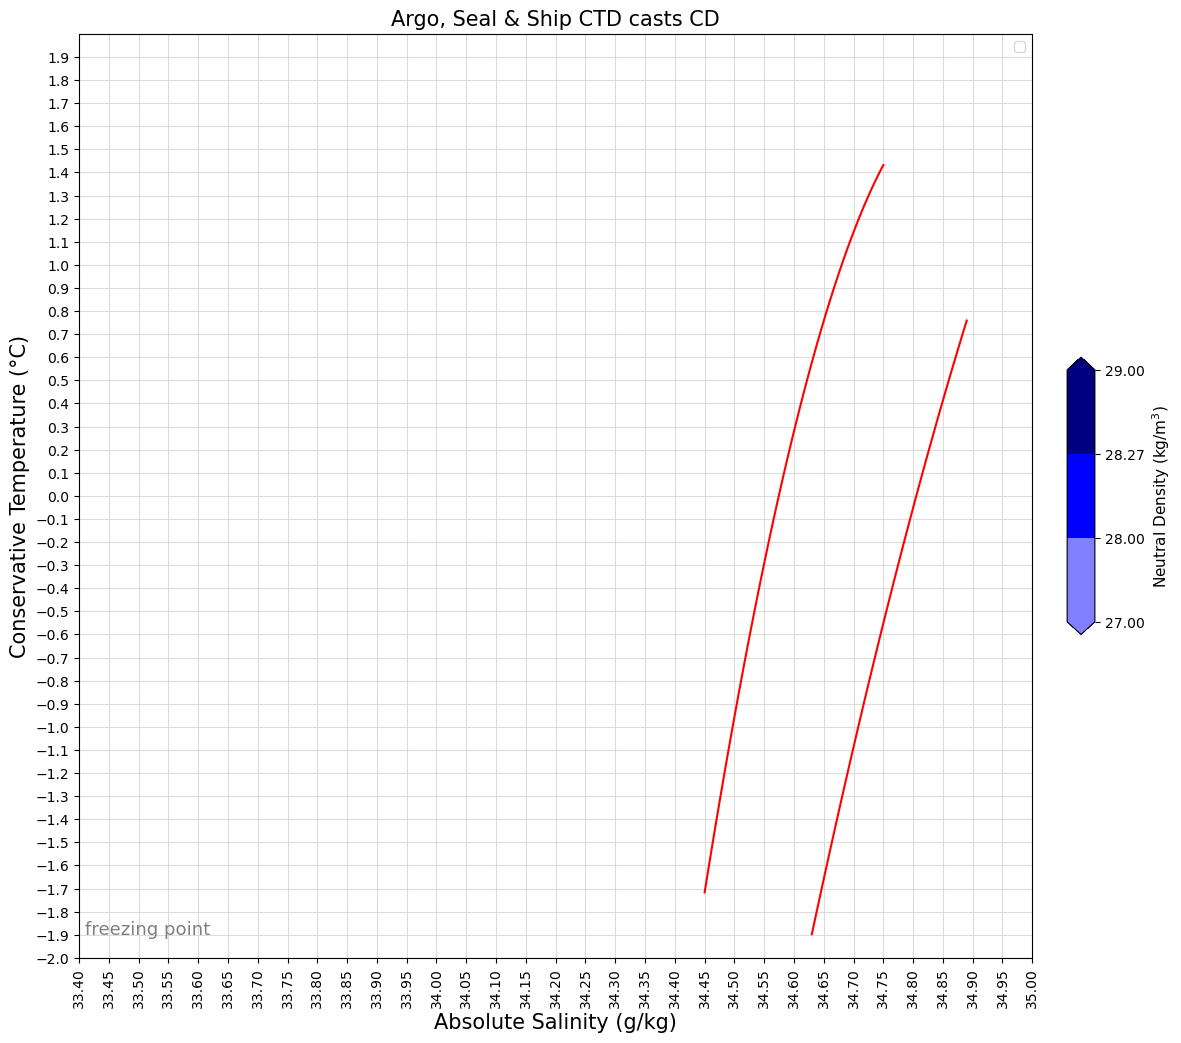

In [4]:
#set the size of the figure
plt.figure(figsize=(15, 12)) 


# Define custom color boundaries
vmin = 27
vmax1 = 28
vmax2 = 28.27
vmax3 = 29


# Define colors for different ranges
#colors = [(0.7, 0.7, 1), (0, 0, 1), (0, 0, 0.5)]  # Light blue, blue, dark blue
colors = [(0.5, 0.5, 1), (0, 0, 1), (0, 0, 0.5)]  # Light blue, blue, dark blue
#colors = [(0.7, 0.7, 0.7), (0, 0, 1), (0.3, 0.3, 0.3)]  # Light blue, blue, dark blue
#cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom_blue', colors, N=256)
cmap_custom = mcolors.ListedColormap(colors)

# Normalize the colormap
norm = mcolors.BoundaryNorm([vmin, vmax1, vmax2, vmax3], cmap_custom.N)


# # Plot the scatter plot with temperature-based coloring and different marker shapes for seals and ships
# seals_scatter = plt.scatter(seals_abs_salinity, seals_cons_temperature,
#                            s=5, c=seals_neutral_density, cmap=cmap_custom, vmin = 27.5, marker='o', label='Seals')

# ships_scatter = plt.scatter(ships_abs_salinity, ships_cons_temperature,
#                            s=20, c=ships_neutral_density, cmap=cmap_custom, vmin = 27.5, marker='^', label='Ships')

# argo_scatter = plt.scatter(argo_abs_salinity, argo_cons_temperature, 
#                            s=40, c=argo_neutral_density, cmap=cmap_custom, vmin=27.5, marker='s', label='Argo')




#plot the x & y values from matlab to put on the neutral density lines from matlab  
# plt.plot(x, y, 'k', linewidth = '2.5')

# Plot the potential density contour lines
## comment these lines out if you are doing the neutral density lines
# CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.05))
# plt.clabel(CS, inline=1, fontsize=10, fmt='%0.2f')


# #plot salinity vs the freezing point 
# plt.plot(sa, FP0, 'gray', linewidth = '2', linestyle = '--')

#put labels on the neutral density lines
# plt.text(34.75,1,'28.27', rotation=70, fontsize=10)
# plt.text(34.62,1.3,'28.00', rotation=70, fontsize=10)
#put labels on the freezing point line
plt.text(33.41,-1.9,'freezing point', fontsize=13, color = 'gray')



#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(33.4,35)
plt.ylim(-2,2)
plt.xticks(np.arange(33.4,35, 0.05), rotation=90)
plt.yticks(np.arange(-2,2, 0.1))
plt.xlabel('Absolute Salinity (g/kg)',  fontsize=15)
plt.ylabel('Conservative Temperature (°C)',  fontsize=15)
plt.grid(color='gainsboro')


# # Add colorbar
#cbar = plt.colorbar(seals_scatter, orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
#cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_custom),orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_custom, norm=norm), orientation='vertical', shrink=0.3, pad=0.03, aspect=10, extend='both')
cbar.set_label('Neutral Density (kg/m$^3$)', fontsize=11)


# Create a legend
legend = plt.legend()

# Set the color of legend handles to black
for handle in legend.legend_handles:
    handle.set_color('black')





# Define the points for your contour line 28.27 neu dense
#contour_points1 = [(34.88, 0.1), (34.85, 0), (34.8, -0.3), (34.75, -0.7), (34.7,-1.2), (34.65,-1.7), (34.63,-1.9)]
contour_points1 = [(34.63,-1.9), (34.65,-1.7), (34.68,-1.3), (34.69,-1.1), (34.73,-0.8), (34.75,-0.6), (34.78,-0.3), (34.8,0), (34.83, 0.3), (34.87,0.5), (34.89,0.8)]
contour_x1, contour_y1 = zip(*contour_points1)


# Separate x and y values
x1 = [point[0] for point in contour_points1]
y1 = [point[1] for point in contour_points1]

# Fit a polynomial of degree 2 (you can change the degree as needed)
coefficients1 = np.polyfit(x1, y1, 2)
polynomial1 = np.poly1d(coefficients1)

# Generate x values for the curve
x_curve1 = np.linspace(min(x1), max(x1), 100)
y_curve1 = polynomial1(x_curve1)


plt.plot(x_curve1, y_curve1, color='red')

# Plot the contour line
#plt.plot(contour_x1, contour_y1, color='black', linewidth=3, label='Contour Line')






# Define the points for your contour line 28 neu dens
#contour_points2 = [(34.9, 1.7), (34.8, 1.2), (34.7, 0.4), (34.6, -0.35), (34.55,-0.7), (34.5,-1.5), (34.48,-1.8)]
contour_points2 = [(34.45,-1.9), (34.46,-1.5), (34.5,-0.8), (34.53,-0.5), (34.55,-0.2), (34.58,0), (34.6,0.2), (34.65,0.7), (34.7,1.1), (34.75,1.5)]
contour_x2, contour_y2 = zip(*contour_points2)


# Separate x and y values
x2 = [point[0] for point in contour_points2]
y2 = [point[1] for point in contour_points2]

# Fit a polynomial of degree 2 (you can change the degree as needed)
coefficients2 = np.polyfit(x2, y2, 2)
polynomial2 = np.poly1d(coefficients2)

# Generate x values for the curve
x_curve2 = np.linspace(min(x2), max(x2), 100)
y_curve2 = polynomial2(x_curve2)


plt.plot(x_curve2, y_curve2, color='red')

# Plot the contour line
#plt.plot(contour_x2, contour_y2, color='black', linewidth=3, label='Contour Line')


# Add a dynamic title
plt.title(f'Argo, Seal & Ship CTD casts CD', fontsize=15)

plt.show()